In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

sns.set(font='NanumGothic', rc={'axes.unicode_minus': False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))
warnings.filterwarnings('ignore')

In [ ]:
movies = pd.read_csv("tmdb_5000_movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies.shape

(4803, 20)

In [ ]:
# 주요 컬럼으로 데이터 프레임 생성
col_lst = ['id', 'title', 'genres', 'vote_average', 'vote_count', 'popularity', 'keywords', 'overview']
movies_df = movies[col_lst]

In [ ]:
pd.set_option('max_colwidth', 80)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id..."


In [ ]:
pd.reset_option("max_colwidth")
movies_df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
from ast import literal_eval

movies_df['genres'].apply(literal_eval)[0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
from ast import literal_eval

# 문자열을 객체로 변경: 리스트 내의 사전
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

# 객체에서 name만 추출: 사전 마다 name을 추출
movies_df['genres'] = movies_df['genres'].apply(lambda x : [ dic['name'] for dic in x] )
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [ dic['name'] for dic in x] )

movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 리스트 객체를 문자열로 변환: 공백으로 구분
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))

# CountVectorizer
count_vect = CountVectorizer(min_df=1, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])

print(genre_mat.shape)

(4803, 276)


In [ ]:
print(genre_mat)

  (0, 0)	1
  (0, 16)	1
  (0, 124)	1
  (0, 232)	1
  (0, 138)	1
  (0, 1)	1
  (0, 24)	1
  (0, 135)	1
  (0, 233)	1
  (1, 0)	1
  (1, 16)	1
  (1, 124)	1
  (1, 24)	1
  (1, 125)	1
  (2, 0)	1
  (2, 16)	1
  (2, 1)	1
  (2, 64)	1
  (2, 20)	1
  (3, 0)	1
  (3, 64)	1
  (3, 90)	1
  (3, 234)	1
  (3, 4)	1
  (3, 68)	1
  :	:
  (4796, 90)	1
  (4796, 234)	1
  (4796, 106)	1
  (4796, 144)	1
  (4797, 234)	1
  (4797, 153)	1
  (4797, 157)	1
  (4798, 0)	1
  (4798, 64)	1
  (4798, 234)	1
  (4798, 4)	1
  (4798, 78)	1
  (4799, 44)	1
  (4799, 214)	1
  (4799, 58)	1
  (4800, 90)	1
  (4800, 44)	1
  (4800, 214)	1
  (4800, 104)	1
  (4800, 50)	1
  (4800, 250)	1
  (4800, 182)	1
  (4800, 251)	1
  (4800, 229)	1
  (4802, 80)	1


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
genre_sim[0]

array([1.        , 0.59628479, 0.4472136 , ..., 0.        , 0.        ,
       0.        ])

In [ ]:
def find_sim_movie(df, sim_matrix, title_name, top_n=10):

    # 입력한 영화의 index
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values

    # 입력한 영화의 유사도 데이터 프레임 추가
    df["similarity"] = sim_matrix[title_index, :].reshape(-1,1)

    # 유사도 내림차순 정렬 후 상위 index 추출
    temp = df.sort_values(by="similarity", ascending=False)
    final_index = temp.index.values[ : top_n]

    return df.iloc[final_index]

In [ ]:
# The Godfather(대부)와 장르별 유사도가 높은 영화 10개
similar_movies = find_sim_movie(movies_df, genre_sim, 'The Godfather', 10)
similar_movies[['title', 'vote_average', "similarity"]]

,title,vote_average,similarity
3636,Light Sleeper,5.7,1.0
892,Casino,7.8,1.0
3866,City of God,8.1,1.0
1243,Mean Streets,7.2,1.0
1370,21,6.5,1.0
4041,This Is England,7.4,1.0
1847,GoodFellas,8.2,1.0
2582,The Place Beyond the Pines,6.8,1.0
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0,1.0
4217,Kids,6.8,1.0


In [ ]:
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]


,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


## Content-based Filtering using Amazon Reviews

In [10]:
!pip install numpy pandas matplotlib seaborn scikit-learn scipy joblib

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [13]:
electronics_data=pd.read_csv("ratings_Electronics.csv",names=['userId', 'productId','Rating','timestamp'])


In [14]:
electronics_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [15]:
electronics_data.shape

(3552424, 4)

In [16]:
electronics_data = electronics_data.iloc[:1048576,0:]

In [17]:
electronics_data.dtypes
electronics_data.info()

,0
userId,object
productId,object
Rating,float64
timestamp,int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048576 non-null  object 
 1   productId  1048576 non-null  object 
 2   Rating     1048576 non-null  float64
 3   timestamp  1048576 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [18]:
electronics_data.describe()['Rating'].T

,Rating
count,1.048576e+06
mean,3.973380e+00
std,1.399329e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [19]:
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


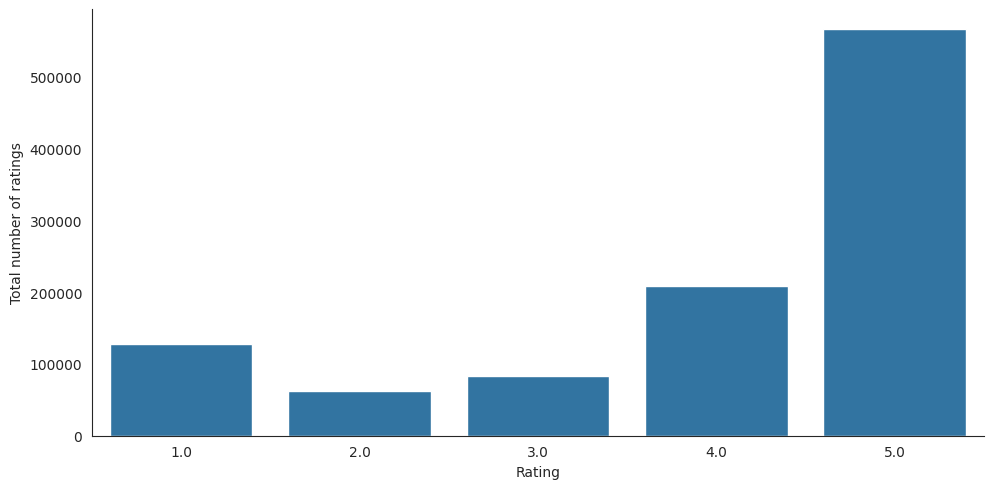

In [22]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.catplot(x="Rating", data=electronics_data, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")

In [23]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.userId)))
print("Total No of products  :", len(np.unique(electronics_data.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 1048576
Total No of Users   : 786330
Total No of products  : 61894


In [24]:
electronics_data.drop(['timestamp'], axis=1,inplace=True)

In [25]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

,Rating
userId,
A5JLAU2ARJ0BO,412
A231WM2Z2JL0U3,249
A25HBO5V8S8SEA,164
A6FIAB28IS79,146
AT6CZDCP4TRGA,128


In [26]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

<Axes: title={'center': 'Quantiles and their Values'}>

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

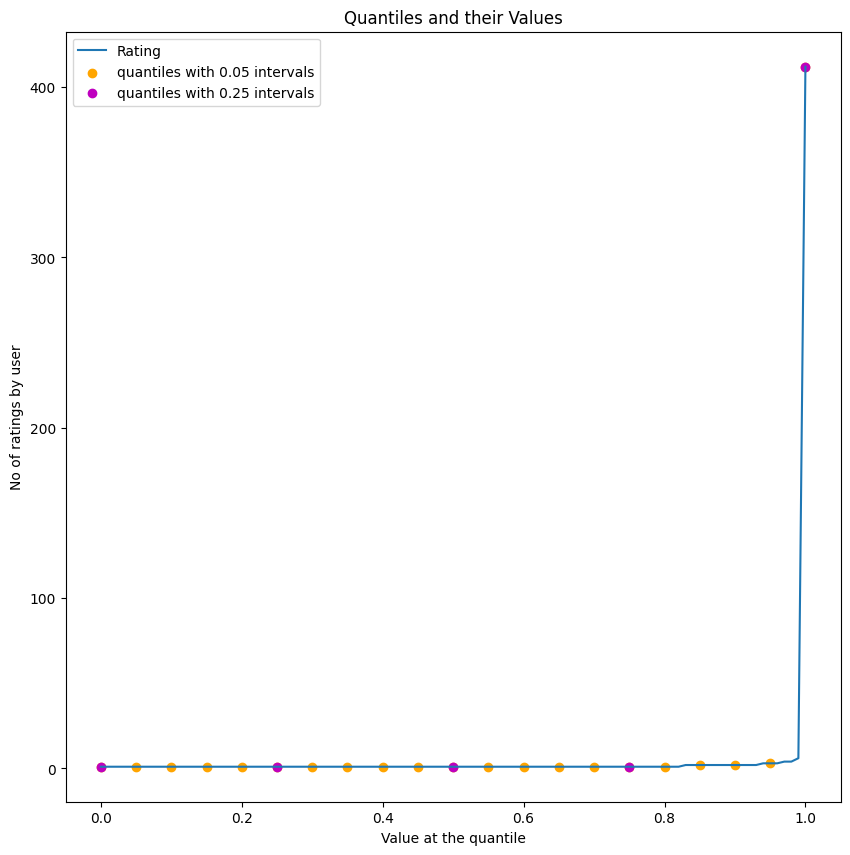

In [27]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()